In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [125]:
df = pd.read_csv('loan_train.csv')

In [126]:
df.shape

(346, 10)

In [127]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


In [129]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [130]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [131]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [132]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


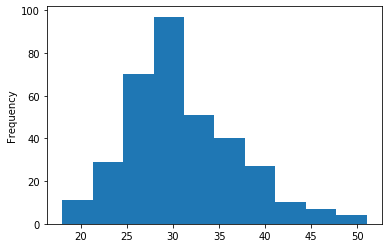

In [133]:
df['age'].plot.hist()

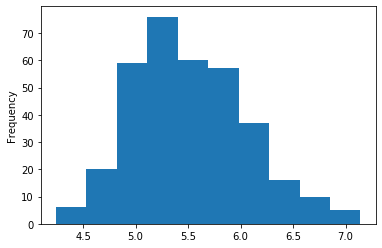

In [134]:
np.power(df['age'],1/2).plot.hist()

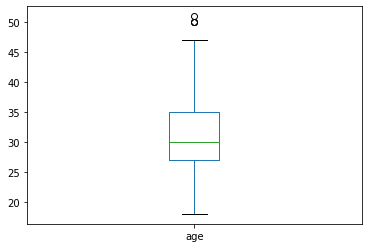

In [135]:
df['age'].plot.box()

In [136]:
df.loc[df['age']>40, 'age']=np.mean(df['age'])

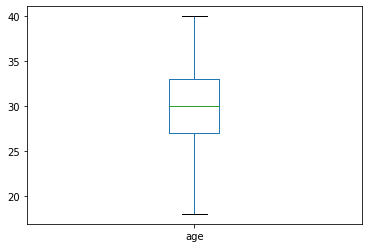

In [137]:
df['age'].plot.box()

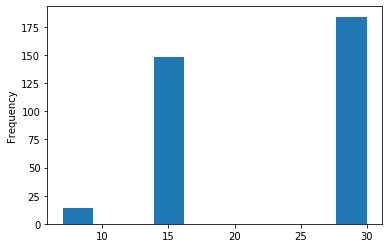

In [138]:
df['terms'].plot.hist()

In [139]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,30.939306,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.000000,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.000000,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.000000,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.000000,college,male


In [140]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [141]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [142]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [143]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

In [144]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,30.939306,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.000000,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.000000,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.000000,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.000000,college,male,4,1


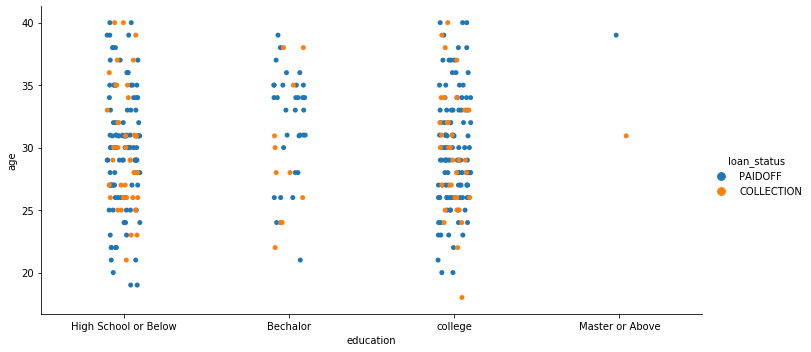

In [145]:
import seaborn as sns
g=sns.catplot(x="education",y="age",hue="loan_status",data=df,height=5, aspect=2)

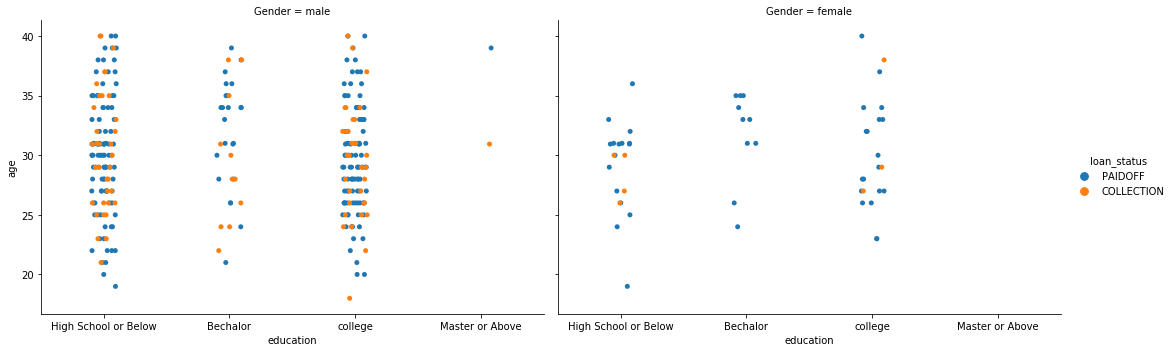

In [146]:
g = sns.catplot(x="education", y="age", hue="loan_status",
                col="Gender", data=df,aspect=1.5)

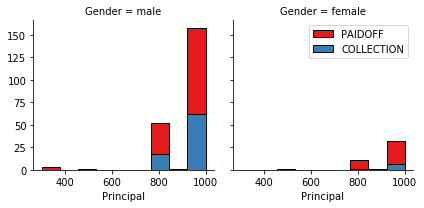

In [147]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

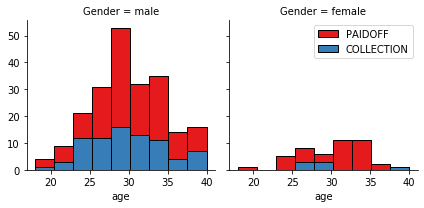

In [148]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

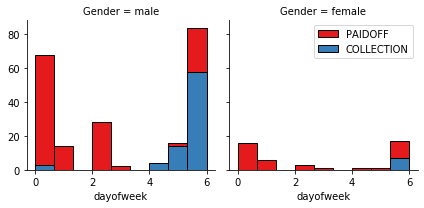

In [149]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [150]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,30.939306,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.000000,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.000000,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.000000,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.000000,college,male,4,1


In [151]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,30.939306,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.000000,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.000000,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.000000,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.000000,college,0,4,1


In [152]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,30.939306,0,High School or Below
1,1000,30,33.000000,1,Bechalor
2,1000,15,27.000000,0,college
3,1000,30,28.000000,1,college
4,1000,30,29.000000,0,college


In [153]:
data = df[['Principal','terms','age','Gender','weekend']]
data = pd.concat([data,pd.get_dummies(df['education'])], axis=1)
data.drop(['Master or Above'], axis = 1,inplace=True)
data.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,30.939306,0,0,0,1,0
1,1000,30,33.000000,1,0,1,0,0
2,1000,15,27.000000,0,0,0,0,1
3,1000,30,28.000000,1,1,0,0,1
4,1000,30,29.000000,0,1,0,0,1


In [154]:
x = data
x.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,30.939306,0,0,0,1,0
1,1000,30,33.000000,1,0,1,0,0
2,1000,15,27.000000,0,0,0,0,1
3,1000,30,28.000000,1,1,0,0,1
4,1000,30,29.000000,0,1,0,0,1


In [155]:
y = pd.get_dummies(df['loan_status'])['PAIDOFF'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [156]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [157]:
logreg = LogisticRegression()

In [158]:
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
predictions = logreg.predict(x_test)

In [160]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [161]:
confusion_matrix(y_test, predictions)

array([[ 2, 13],
       [ 4, 51]], dtype=int64)

In [162]:
precision_score(y_test, predictions)

0.796875

In [163]:
recall_score(y_test, predictions)

0.9272727272727272

In [164]:
f1_score(y_test, predictions)

0.8571428571428571

In [165]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

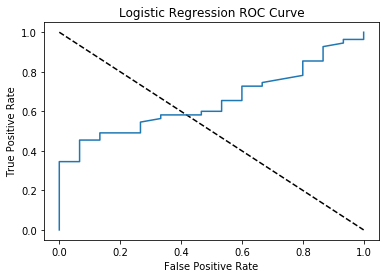

In [166]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()